In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
sheet_id = "1_B9zYmOh3ophAuhWeYRm1KIFBjxaZb_eBEmXDwDqCiM"
sheet_name = "BBBC039"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
df = pd.read_csv(url)

In [3]:
df = df.dropna()
df

,file,cell_line,cells_manual,micronuclei_manual,cells_stardist,micronuclei_stardist,patch,size
0,s01,KL,620,30,619,28,9,1024
1,s01,KL,680,58,701,65,39,1024
2,s01,KL,868,62,887,66,51,1024
3,s03,KL,942,49,953,55,19,1024
4,s03,KL,1041,77,1068,83,28,1024
5,s03,KL,698,55,703,59,45,1024
6,s07,KP,843,26,810,18,7,1024
7,s07,KP,549,31,548,35,28,1024
8,s07,KP,783,29,758,32,30,1024
9,s10,KP,756,35,742,39,2,1024


In [4]:
# Create micronuclei_cell_ratio for both manual and stardist
df["manual"] = df["micronuclei_manual"]/df["cells_manual"]
df["micronuclAI"] = df["micronuclei_stardist"]/df["cells_stardist"]

# Calcualte the absolute percentage difference (apd) between manual and micronuclAI
df["diff"] = abs(df["manual"] - df["micronuclAI"])
df["res"] = df["micronuclAI"] - df["manual"]
df["apd"] = df["diff"]/((df["manual"]+df["micronuclAI"])/2)
df["ba"] = (df["manual"]+df["micronuclAI"])/2
df

,file,cell_line,cells_manual,micronuclei_manual,cells_stardist,micronuclei_stardist,patch,size,manual,micronuclAI,diff,res,apd,ba
0,s01,KL,620,30,619,28,9,1024,0.048387,0.045234,0.003153,-0.003153,0.067353,0.046811
1,s01,KL,680,58,701,65,39,1024,0.085294,0.092725,0.007431,0.007431,0.083481,0.089009
2,s01,KL,868,62,887,66,51,1024,0.071429,0.074408,0.002980,0.002980,0.040861,0.072918
3,s03,KL,942,49,953,55,19,1024,0.052017,0.057712,0.005696,0.005696,0.103810,0.054865
4,s03,KL,1041,77,1068,83,28,1024,0.073967,0.077715,0.003748,0.003748,0.049419,0.075841
5,s03,KL,698,55,703,59,45,1024,0.078797,0.083926,0.005129,0.005129,0.063046,0.081361
6,s07,KP,843,26,810,18,7,1024,0.030842,0.022222,0.008620,-0.008620,0.324888,0.026532
7,s07,KP,549,31,548,35,28,1024,0.056466,0.063869,0.007402,0.007402,0.123028,0.060167
8,s07,KP,783,29,758,32,30,1024,0.037037,0.042216,0.005179,0.005179,0.130703,0.039627
9,s10,KP,756,35,742,39,2,1024,0.046296,0.052561,0.006264,0.006264,0.126736,0.049428


In [5]:
# Melt the dataframe
df_melted = df.melt(id_vars=["file", "cell_line","patch"], value_vars=["manual", "micronuclAI"], var_name="micronuclei_cell_ratio_type", value_name="micronuclei_cell_ratio")
df_melted

,file,cell_line,patch,micronuclei_cell_ratio_type,micronuclei_cell_ratio
0,s01,KL,9,manual,0.048387
1,s01,KL,39,manual,0.085294
2,s01,KL,51,manual,0.071429
3,s03,KL,19,manual,0.052017
4,s03,KL,28,manual,0.073967
5,s03,KL,45,manual,0.078797
6,s07,KP,7,manual,0.030842
7,s07,KP,28,manual,0.056466
8,s07,KP,30,manual,0.037037
9,s10,KP,2,manual,0.046296


In [6]:
# Make a new column with the file and the patch
df_melted["file_patch"] = df_melted["file"] + "_" + df_melted["patch"].astype(str)

# Make a new column with the cell line and the patch
df_melted["cell_line_patch"] = df_melted["cell_line"] + "_" + df_melted["patch"].astype(str)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_17388/1570964869.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


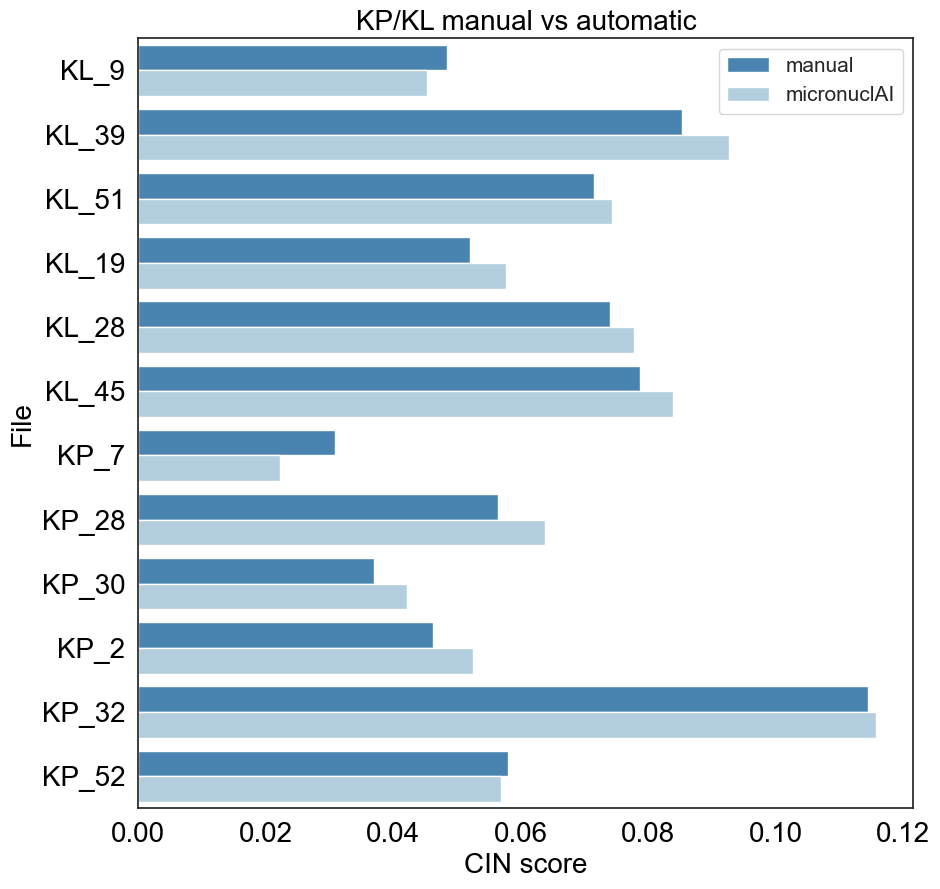

In [7]:
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_melted, y="cell_line_patch", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type", palette="Blues_r", ax=ax)
ax.legend(loc='upper right', fontsize=15)
ax.set_title("KP/KL manual vs automatic", color="black", fontsize=20)
ax.set_xlabel("CIN score", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("File", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/KPKL_comparison.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/KPKL_comparison.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_17388/2309421698.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0)


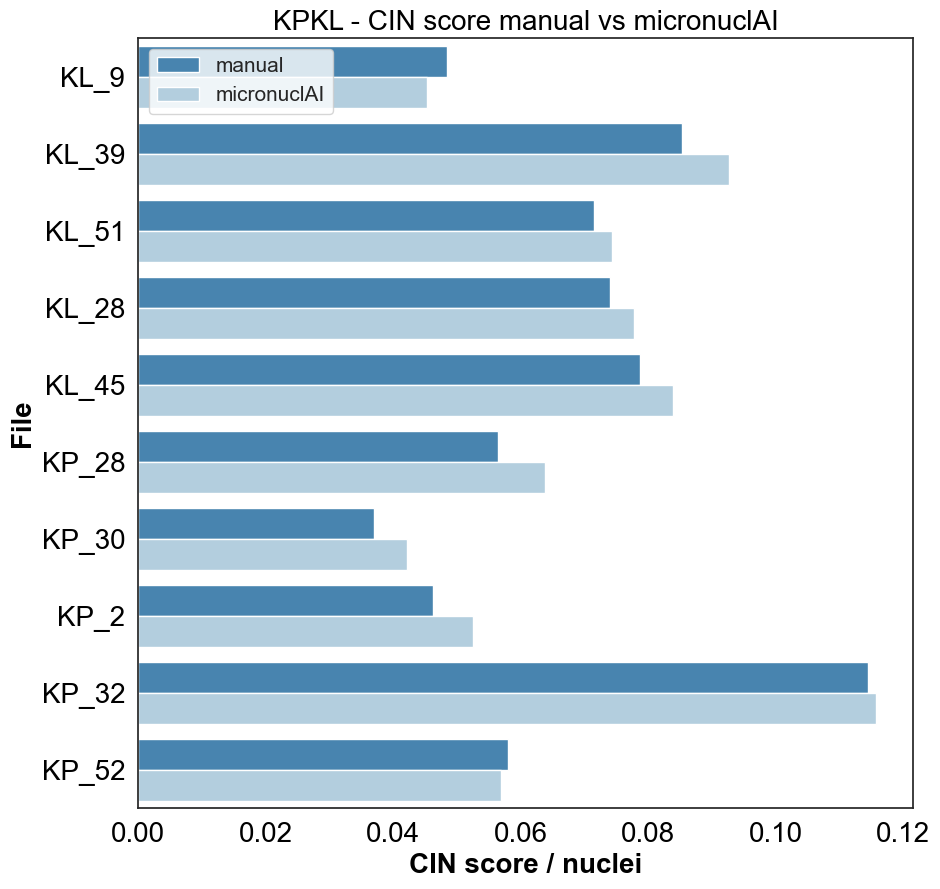

In [11]:
# choose 10 values at random from a numpy array
np.random.seed(42)
random_files = np.random.choice(df_melted["cell_line_patch"].unique(), 10, replace=False)

# Select the rows where the file is in random_files
df_melted_sample = df_melted[df_melted["cell_line_patch"].isin(random_files)]

# Plot the ratio
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_melted_sample, y="cell_line_patch", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type", palette="Blues_r", ax=ax)
ax.legend(loc='upper left', fontsize=15, markerscale=2)
ax.set_title("KPKL - CIN score manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score / nuclei", color="black", fontsize=20, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20, rotation=0)
ax.set_ylabel("File", color="black", fontsize=20, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/KPKL_comparison_sample.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/KPKL_comparison_sample.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_49887/3095403886.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)


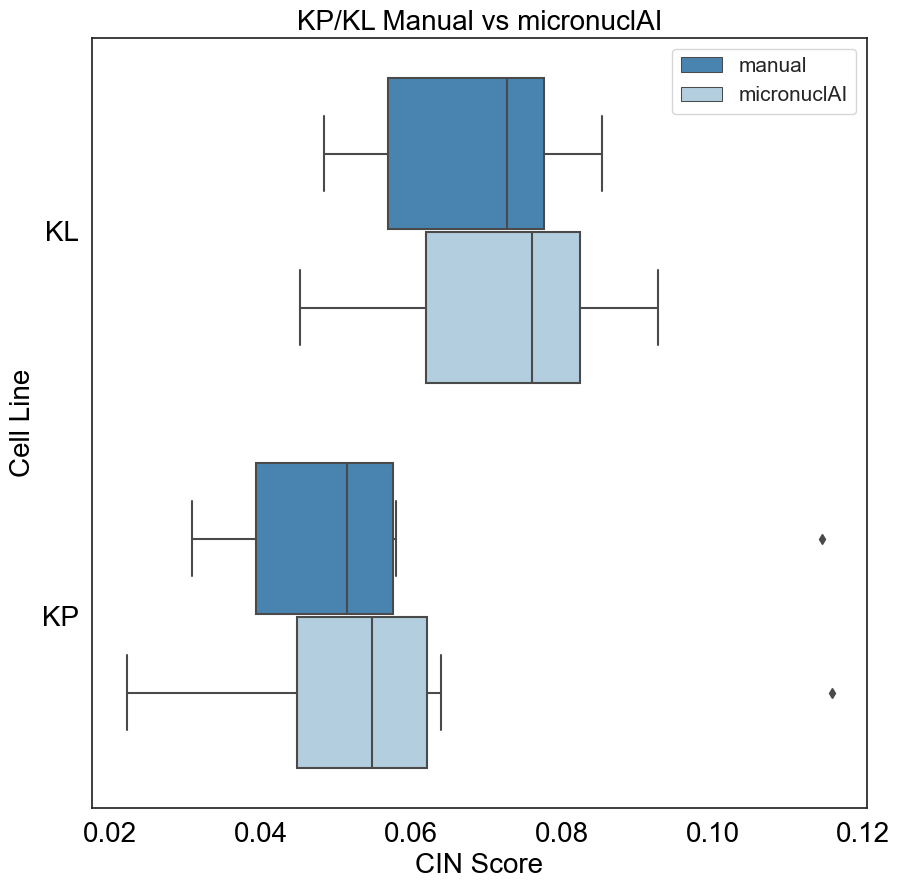

In [62]:
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_theme(style="white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=df_melted, y="cell_line", x="micronuclei_cell_ratio", hue="micronuclei_cell_ratio_type",  palette="Blues_r")
ax.legend(loc='upper right', fontsize=15)
ax.set_title("KP/KL Manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN Score", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("Cell Line", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()
fig.savefig("../figures/KPKL_comparison_aggregated.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/KPKL_comparison_aggregated.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_49887/4046834109.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_49887/4046834109.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


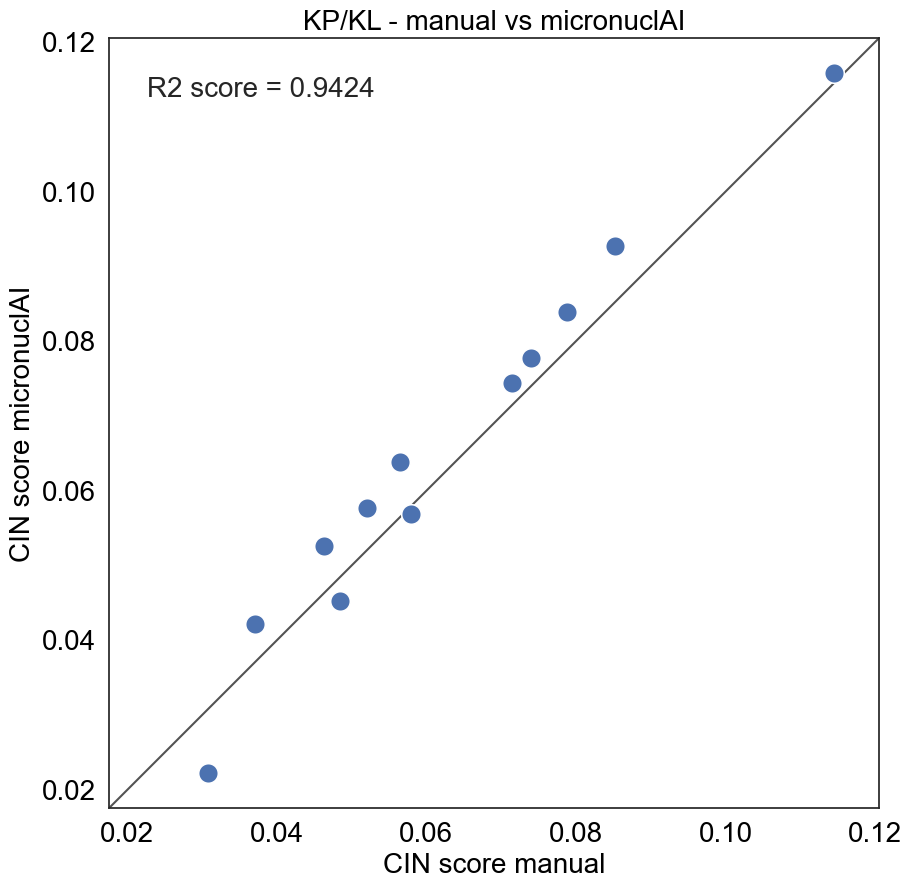

In [63]:
# Plot manual vs micronuclAI
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="manual", y="micronuclAI", ax=ax, s=200)

# Add R2 score
r2 = r2_score(df["manual"], df["micronuclAI"])
ax.text(0.05, 0.95, f"R2 score = {r2:.4f}", transform=ax.transAxes, fontsize=20, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

#Plot diagonal line
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title("KP/KL - manual vs micronuclAI", color="black", fontsize=20)
ax.set_xlabel("CIN score manual", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("CIN score micronuclAI", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)

plt.show()
fig.savefig("../figures/KPKL_corr_black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/KPKL_corr_black.pdf", dpi=300, bbox_inches='tight', transparent=True)

/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_49887/3929464791.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
/var/folders/9c/s912yv1x3dn6xwpfnggf8wt80000gn/T/ipykernel_49887/3929464791.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


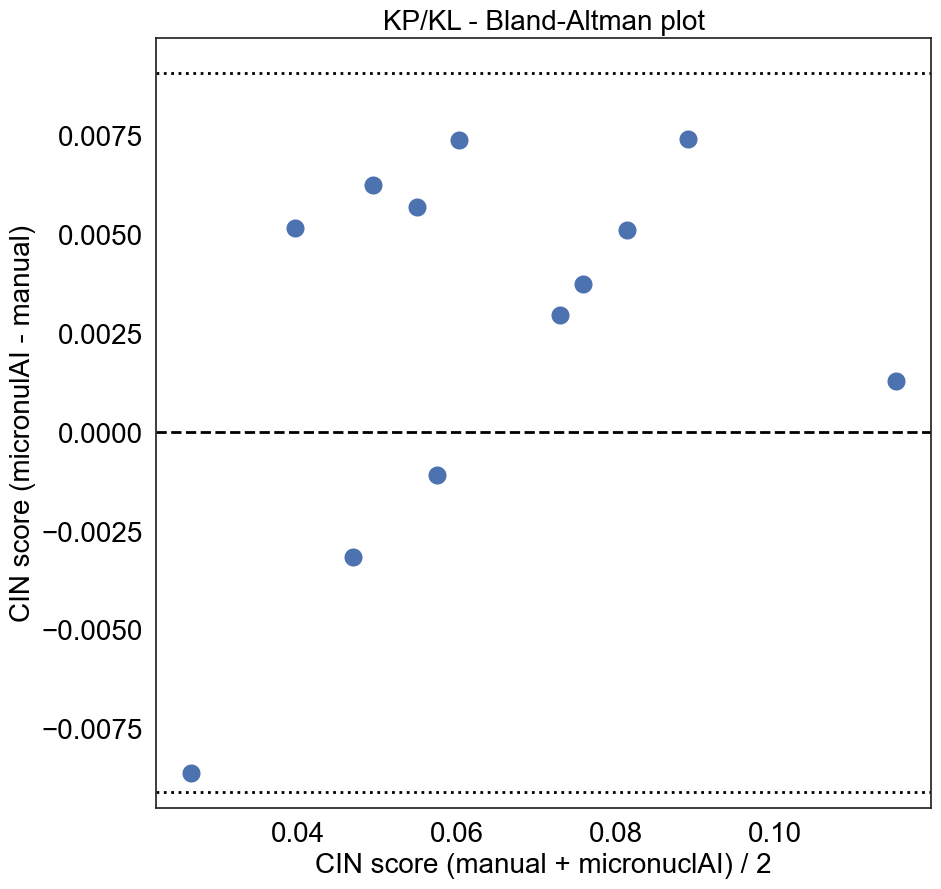

In [64]:
# Plot residuals vs apd
sns.set(rc={'ytick.labelcolor':'black','xtick.labelcolor':'black', 'text.color':'black'})
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df, x="ba", y="res",ax=ax, s=200)

# Plot horizontal line at 0
ax.axhline(y=0, color='Black', linestyle='--', linewidth=2)

# Add two lines for the 0.95 confidence interval
ax.axhline(y=1.96*np.std(df["res"]), color='Black', linestyle=':', linewidth=2)
ax.axhline(y=-1.96*np.std(df["res"]), color='Black', linestyle=':', linewidth=2)

# Formating
ax.set_title("KP/KL - Bland-Altman plot", color="black", fontsize=20)
ax.set_xlabel("CIN score (manual + micronuclAI) / 2", color="black", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
ax.set_ylabel("CIN score (micronulAI - manual)", color="black", fontsize=20)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)
plt.show()

plt.show()
fig.savefig("../figures/KPKL_BA_black.png", dpi=300, bbox_inches='tight', transparent=True)
fig.savefig("../figures/KPKL_BA_black.pdf", dpi=300, bbox_inches='tight', transparent=True)